In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Plot stuff

### Pendulum

In [216]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.PendulumTest_res.csv')

In [217]:
res.columns.tolist()

['time',
 'p.body.Active',
 'p.body.omega[1]',
 'p.body.omega[2]',
 'p.body.omega[3]',
 'p.body.q[1]',
 'p.body.q[2]',
 'p.body.q[3]',
 'p.body.q[4]',
 'p.body.r[1]',
 'p.body.r[2]',
 'p.body.r[3]',
 'p.joint.angle',
 'p.joint.mu',
 'der(p.body.Active)',
 'der(p.body.omega[1])',
 'der(p.body.omega[2])',
 'der(p.body.omega[3])',
 'der(p.body.q[1])',
 'der(p.body.q[2])',
 'der(p.body.q[3])',
 'der(p.body.q[4])',
 'der(p.body.r[1])',
 'der(p.body.r[2])',
 'der(p.body.r[3])',
 'der(p.joint.angle)',
 'der(p.joint.mu)',
 'der(p.body.OutPort.omega[1])',
 'der(p.body.OutPort.omega[2])',
 'der(p.body.OutPort.omega[3])',
 'der(p.body.T[1,1])',
 'der(p.body.T[1,2])',
 'der(p.body.T[1,3])',
 'der(p.body.T[2,1])',
 'der(p.body.T[2,2])',
 'der(p.body.T[2,3])',
 'der(p.body.T[3,1])',
 'der(p.body.T[3,2])',
 'der(p.body.T[3,3])',
 'der(p.body.v[1])',
 'der(p.body.v[2])',
 'der(p.body.v[3])',
 'der(p.joint.RB[1])',
 'der(p.joint.RB[2])',
 'der(p.joint.RB[3])',
 'p.F[1]',
 'p.F[2]',
 'p.F[3]',
 'p.M[1]'

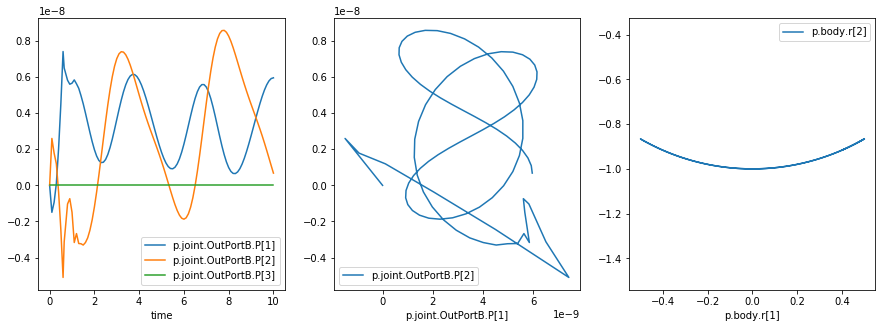

In [226]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'p.joint.OutPortB.P[1]'
    , 'p.joint.OutPortB.P[2]'
    , 'p.joint.OutPortB.P[3]'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'p.joint.OutPortB.P[1]'
    , 'p.joint.OutPortB.P[2]'
    ]
].plot(x = 'p.joint.OutPortB.P[1]', ax = axs[1])

axs[2].axis('equal')
res[
    [ 'p.body.r[1]'
    , 'p.body.r[2]'
    ]
].plot(x = 'p.body.r[1]', ax = axs[2])

### Double Pendulum

In [241]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.DoublePendulumTest_res.csv')

In [80]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.DoublePendulumTest_res.csv')
len(res)

1003

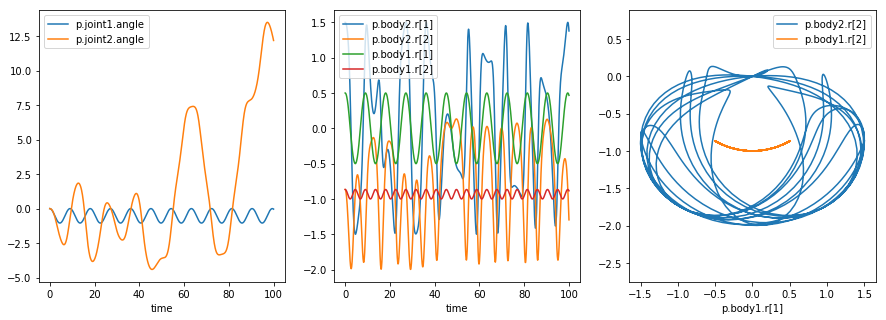

In [93]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'p.joint1.angle'
    , 'p.joint2.angle'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'p.body2.r[1]'
    , 'p.body2.r[2]'
    , 'p.body1.r[1]'
    , 'p.body1.r[2]'
    ]
].plot(x = 'time', ax = axs[1])

axs[2].axis('equal')
num = len(res)
res.head(num)[
    [ 'p.body2.r[1]'
    , 'p.body2.r[2]'
    ]
].plot(x = 'p.body2.r[1]', ax = axs[2])
res.head(num)[
    [ 'p.body1.r[1]'
    , 'p.body1.r[2]'
    ]
].plot(x = 'p.body1.r[1]', ax = axs[2])

### Single body rolling

In [243]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.SingleBodyRollingTest_res.csv')

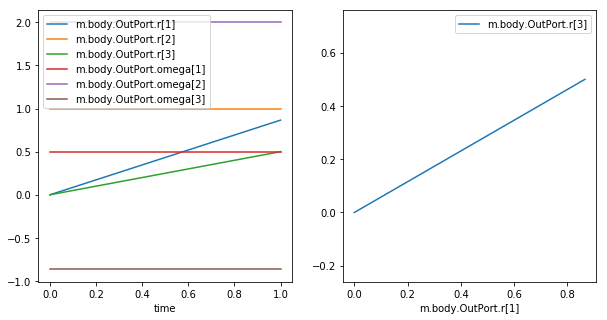

In [244]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[2]'
    , 'm.body.OutPort.r[3]'
    , 'm.body.OutPort.omega[1]'
    , 'm.body.OutPort.omega[2]'
    , 'm.body.OutPort.omega[3]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'm.body.OutPort.r[1]'
    , 'm.body.OutPort.r[3]'
    ]
].plot(x = 'm.body.OutPort.r[1]', ax = ax2)

### Omni-wheel without contacts and gravity

##### Cleanup

In [2]:
# !rm /home/vf/om/models/omni/test/out/MbsLite.Test.SingleRollerOmniWheelTest*

#### Calc

In [96]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniWheelAtRestTest_res.csv')

In [97]:
# res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelAtRestTest_res.csv')

In [98]:
n = 5

In [70]:
print(len(res))
res.head()

10002


,time,m.wheel.Joints[1].angle,m.wheel.Joints[2].angle,m.wheel.Joints[3].angle,m.wheel.Joints[4].angle,m.wheel.Joints[5].angle,m.wheel.Joints[1].mu,m.wheel.Joints[2].mu,m.wheel.Joints[3].mu,m.wheel.Joints[4].mu,...,m.wheel.Wheel.OutPort.omega[3],m.wheel.Wheel.OutPort.r[1],m.wheel.Wheel.OutPort.r[2],m.wheel.Wheel.OutPort.r[3],m.wheel.Wheel.OutPort.v[1],m.wheel.Wheel.OutPort.v[2],m.wheel.Wheel.OutPort.v[3],"m.wheel.Wheel.T[1,1]","m.wheel.Wheel.T[2,1]","m.wheel.Wheel.T[3,1]"
0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000e+00,0.05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
1,0.01,-0.000050,-0.000016,0.000040,0.000040,-0.000015,-0.009961,-0.003125,0.008030,0.008088,...,1.000050,-4.494471e-22,0.05,1.626031e-21,-1.894120e-19,-8.033009e-18,8.247449e-19,0.999900,0.010000,-0.010000
2,0.02,-0.000199,-0.000063,0.000160,0.000162,-0.000060,-0.019921,-0.006344,0.016000,0.016232,...,1.000199,-4.249835e-21,0.05,1.306946e-20,-9.128352e-19,-9.866000e-18,1.883020e-18,0.999600,0.019996,-0.019997
3,0.03,-0.000448,-0.000143,0.000360,0.000365,-0.000134,-0.029879,-0.009656,0.023912,0.024434,...,1.000447,-2.411666e-20,0.05,4.413137e-20,-3.058986e-18,-1.233398e-17,4.315798e-18,0.999100,0.029987,-0.029991
4,0.04,-0.000797,-0.000256,0.000638,0.000651,-0.000236,-0.039834,-0.013060,0.031762,0.032691,...,1.000794,-5.834107e-20,0.05,9.294437e-20,-3.546574e-18,-1.339644e-17,5.412463e-18,0.998401,0.039968,-0.039979


In [71]:
df = res[
    [ 'time'
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[1,2]'
    , 'm.wheel.OutPortK.T[1,3]'
    ]
]
df = df.assign(
    **{ 'm.selfRot' : df.apply(lambda row:
        ( np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        if row['m.wheel.OutPortK.T[1,2]'] >= 0 else
#         np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        2 * np.pi - np.arccos(row['m.wheel.OutPortK.T[1,1]'])
        ) * 180/np.pi
        , axis = 1
        )
      }
)
df.head()

,time,"m.wheel.OutPortK.T[1,1]","m.wheel.OutPortK.T[1,2]","m.wheel.OutPortK.T[1,3]",m.selfRot
0,0.00,1.000000,0.00,0.000000,0.000000
1,0.01,0.999900,-0.01,0.009999,359.189722
2,0.02,0.999600,-0.02,0.019993,358.379484
3,0.03,0.999100,-0.03,0.029978,357.569326
4,0.04,0.998401,-0.04,0.039947,356.759289


In [72]:
tmp = pd.DataFrame(
    { 'time'   : np.linspace(0, 4 * np.pi, 100)
    , 'cos'    : np.cos(np.linspace(0, 4 * np.pi, 100))
    , 'arccos' : np.arccos(np.cos(np.linspace(0, 4 * np.pi, 100)))
    }
)
tmp.head()

,arccos,cos,time
0,0.000000,1.000000,0.000000
1,0.126933,0.991955,0.126933
2,0.253866,0.967949,0.253866
3,0.380799,0.928368,0.380799
4,0.507732,0.873849,0.507732


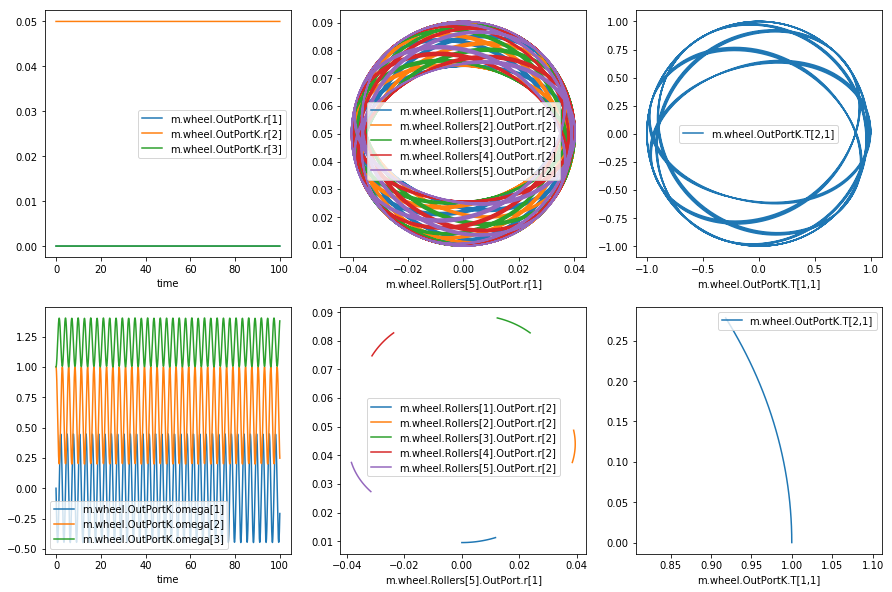

In [73]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'm.wheel.OutPortK.r[1]'
    , 'm.wheel.OutPortK.r[2]'
    , 'm.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

axs[0][1].axis('equal')
for i in range(n):
    res[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[0][1])
axs[0][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[0][2].axis('equal')
res[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[0][2])

res[
    [ 'time'
    , 'm.wheel.OutPortK.omega[1]'
    , 'm.wheel.OutPortK.omega[2]'
    , 'm.wheel.OutPortK.omega[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

axs[1][1].axis('equal')
for i in range(n):
    res.head(30)[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[1][1])
axs[1][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[1][2].axis('equal')
res.head(30)[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[1][2])

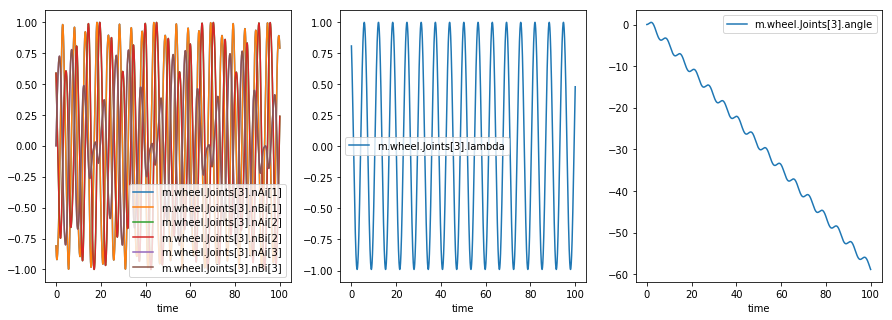

In [99]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

res[
    [ 'time'
    , 'm.wheel.Joints[3].nAi[1]'
    , 'm.wheel.Joints[3].nBi[1]'
    , 'm.wheel.Joints[3].nAi[2]'
    , 'm.wheel.Joints[3].nBi[2]'
    , 'm.wheel.Joints[3].nAi[3]'
    , 'm.wheel.Joints[3].nBi[3]'
    ]
].plot(x = 'time', ax = axs[0])

res[
    [ 'time'
    , 'm.wheel.Joints[3].lambda'
    ]
].plot(x = 'time', ax = axs[1])

res[
    [ 'time'
    , 'm.wheel.Joints[3].angle'
    ]
].plot(x = 'time', ax = axs[2])


In [75]:
res[
    [ 'time' 
    , 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].tail(10)

,time,"m.wheel.OutPortK.T[1,1]","m.wheel.OutPortK.T[2,1]"
9992,99.92,-0.377284,-0.530301
9993,99.93,-0.367888,-0.533312
9994,99.94,-0.358471,-0.536258
9995,99.95,-0.349033,-0.539141
9996,99.96,-0.339576,-0.541960
9997,99.97,-0.330098,-0.544716
9998,99.98,-0.320601,-0.547409
9999,99.99,-0.311085,-0.550041
10000,100.00,-0.301549,-0.552611
10001,100.00,-0.301549,-0.552611


### Omni-wheel on plane free

In [113]:
res = pd.read_csv('/home/vf/om/models/omni/tmp/MbsLite.Test.Omni.OmniWheelOnPlaneOldSchooTest_res.csv')

In [124]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.Omni.OmniWheelOnPlaneTest_res.csv')

In [125]:
len(res)

1005

In [126]:
n = 5
nActual = 5

/home/vf/om/ve/lib/python3.5/site-packages/matplotlib/axes/_base.py:3152: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


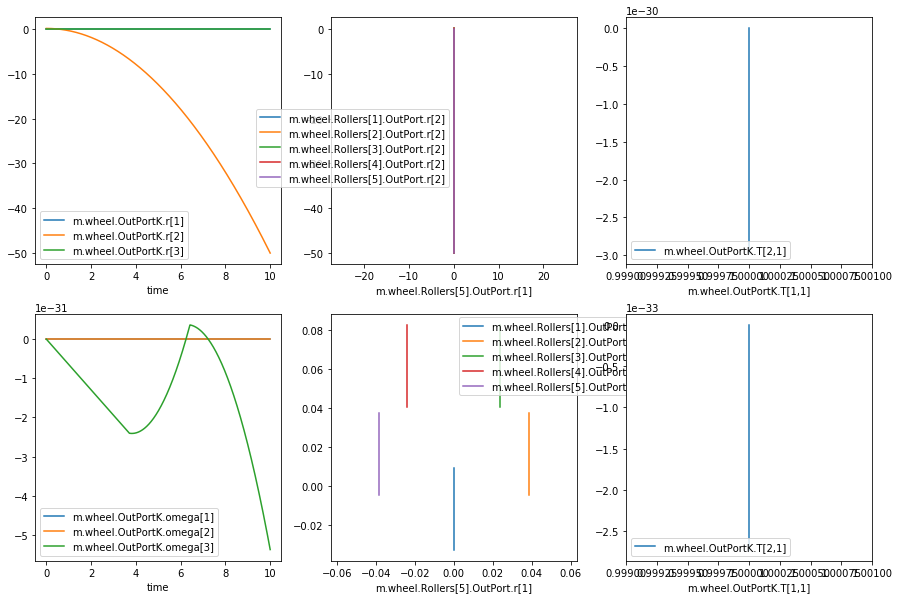

In [127]:
fig, axs = plt.subplots(2, 3, figsize = (15, 10))

res[
    [ 'time'
    , 'm.wheel.OutPortK.r[1]'
    , 'm.wheel.OutPortK.r[2]'
    , 'm.wheel.OutPortK.r[3]'
    ]
].plot(x = 'time', ax = axs[0][0])

axs[0][1].axis('equal')
for i in range(n):
    res[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[0][1])
axs[0][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[0][2].axis('equal')
res[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[0][2])

res[
    [ 'time'
    , 'm.wheel.OutPortK.omega[1]'
    , 'm.wheel.OutPortK.omega[2]'
    , 'm.wheel.OutPortK.omega[3]'
    ]
].plot(x = 'time', ax = axs[1][0])

axs[1][1].axis('equal')
for i in range(n):
    res.head(30)[
        [ 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]'
        , 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[2]'
        ]
    ].plot(x = 'm.wheel.Rollers[' + str(i + 1) + '].OutPort.r[1]', ax = axs[1][1])
axs[1][1].legend(bbox_to_anchor=(0.5, 0.65))

axs[1][2].axis('equal')
res.head(30)[
    [ 'm.wheel.OutPortK.T[1,1]'
    , 'm.wheel.OutPortK.T[2,1]'
    ]
].plot(x = 'm.wheel.OutPortK.T[1,1]', ax = axs[1][2])

In [103]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(res.iloc[0])

time                                         0.000000e+00
m.wheel.Contacts[5].relvn                    0.000000e+00
m.wheel.Joints[1].angle                      0.000000e+00
m.wheel.Joints[2].angle                      0.000000e+00
m.wheel.Joints[3].angle                      0.000000e+00
m.wheel.Joints[4].angle                      0.000000e+00
m.wheel.Joints[5].angle                      0.000000e+00
m.wheel.Joints[1].mu                         0.000000e+00
m.wheel.Joints[2].mu                         0.000000e+00
m.wheel.Joints[3].mu                         0.000000e+00
m.wheel.Joints[4].mu                         0.000000e+00
m.wheel.Joints[5].mu                         0.000000e+00
m.wheel.Rollers[1].Active                    1.000000e+00
m.wheel.Rollers[2].Active                    1.000000e+00
m.wheel.Rollers[3].Active                    1.000000e+00
m.wheel.Rollers[4].Active                    1.000000e+00
m.wheel.Rollers[5].Active                    1.000000e+00
m.wheel.Roller

In [273]:
R = 0.05
n = 5
k = 2 # starting from 1

vertical = np.array([ 0, 1 ])

alpha = np.pi / n
omega = 1 / R
R1 = R * np.cos(alpha)

wheel_center = R * vertical
roller_angle = 2 * alpha * (k - 1)
roller_center_rel = R1 * np.array([ np.sin(roller_angle), -np.cos(roller_angle) ])
roller_center = wheel_center + roller_center_rel
dist_to_roller_center = np.sqrt(sum(roller_center * roller_center))

roller_v = np.cross([ 0, 0, -omega ], [ roller_center[0], roller_center[1], 0 ])[:-1]
roller_v[1]

-0.7694208842938134

### Vertical Wheel

In [52]:
res = pd.read_csv('/home/vf/om/models/omni/test/out/MbsLite.Test.OmniWheelTest_res.csv')

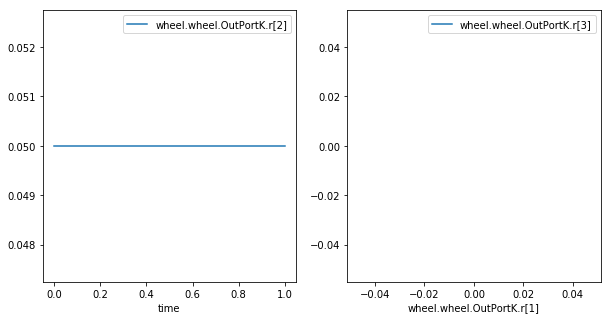

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))

res[
    [ 'time'
    , 'wheel.wheel.OutPortK.r[2]'
    ]
].plot(x = 'time', ax = ax1)

ax2.axis('equal')
res[
    [ 'wheel.wheel.OutPortK.r[1]'
    , 'wheel.wheel.OutPortK.r[3]'
    ]
].plot(x = 'wheel.wheel.OutPortK.r[1]', ax = ax2)

# OM

In [ ]:
import OMPython
from OMPython import OMCSessionZMQ

In [ ]:
help(OMPython)

In [2]:
omc = OMCSessionZMQ()

2018-09-15 11:37:09,526 - OMPython - INFO - OMC Server is up and running at file:////tmp/openmodelica.vf.port.0f9aeff4836b415db2f5d0b70a221f1d pid=22247


In [3]:
omc.sendExpression("cd()")

'/home/vf/om/models/omni'

In [7]:
omc.sendExpression('cd("tmp")')
omc.sendExpression("cd()")

'/home/vf/om/models/omni/tmp'

In [4]:
omc.sendExpression('loadModel(Modelica)')

True

In [5]:
root = '/home/vf/om/models/omni/thin/MBS'
path_MBS = root + '/package.mo'
path_MBS_Basics = root + '/Basics.mo'
paths = [
    path_MBS,
    path_MBS_Basics,
]
display(paths)

['/home/vf/om/models/omni/thin/MBS/package.mo',
 '/home/vf/om/models/omni/thin/MBS/Basics.mo']

In [12]:
omc.sendExpression('loadFile("' + path_MBS + '")')

False

In [ ]:
sim = omc.sendExpression('simulate(A, outputFormat="csv")')

In [ ]:
sim

In [ ]:
!mv {sim['resultFile']} .

In [ ]:
ls

In [ ]:
res = pd.read_csv('A_res.csv')

In [ ]:
res.hist()

In [ ]:
res['x'].plot()

In [ ]:
res['der(x)'].plot()